In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
# Loading MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [3]:
# Model 0: Simple CNN
class CNNModel0(nn.Module):
    def __init__(self):
        super(CNNModel0, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 32*7*7)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model 1: Deeper CNN with more parameters
class CNNModel1(nn.Module):
    def __init__(self):
        super(CNNModel1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128*3*3, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 128*3*3)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [4]:
# Training function
def train_model(model, trainloader, criterion, optimizer, epochs=10):
    model.train()
    train_losses = []
    train_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for data in trainloader:
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(trainloader)
        train_accuracy = 100 * correct / total

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    
    return train_losses, train_accuracies


In [5]:
# Initialize models
model0 = CNNModel0()
model1 = CNNModel1()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer0 = optim.Adam(model0.parameters(), lr=0.001)
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

# Train both models
epochs = 10
losses0, accuracies0 = train_model(model0, trainloader, criterion, optimizer0, epochs)
losses1, accuracies1 = train_model(model1, trainloader, criterion, optimizer1, epochs)


Epoch [1/10] - Loss: 0.1579, Accuracy: 95.33%
Epoch [2/10] - Loss: 0.0447, Accuracy: 98.59%
Epoch [3/10] - Loss: 0.0327, Accuracy: 98.97%
Epoch [4/10] - Loss: 0.0239, Accuracy: 99.24%
Epoch [5/10] - Loss: 0.0191, Accuracy: 99.39%
Epoch [6/10] - Loss: 0.0150, Accuracy: 99.52%
Epoch [7/10] - Loss: 0.0141, Accuracy: 99.54%
Epoch [8/10] - Loss: 0.0103, Accuracy: 99.67%
Epoch [9/10] - Loss: 0.0097, Accuracy: 99.67%
Epoch [10/10] - Loss: 0.0065, Accuracy: 99.78%
Epoch [1/10] - Loss: 0.1499, Accuracy: 95.28%
Epoch [2/10] - Loss: 0.0425, Accuracy: 98.66%
Epoch [3/10] - Loss: 0.0287, Accuracy: 99.11%
Epoch [4/10] - Loss: 0.0219, Accuracy: 99.29%
Epoch [5/10] - Loss: 0.0188, Accuracy: 99.40%
Epoch [6/10] - Loss: 0.0161, Accuracy: 99.51%
Epoch [7/10] - Loss: 0.0117, Accuracy: 99.64%
Epoch [8/10] - Loss: 0.0119, Accuracy: 99.62%
Epoch [9/10] - Loss: 0.0101, Accuracy: 99.66%
Epoch [10/10] - Loss: 0.0097, Accuracy: 99.69%


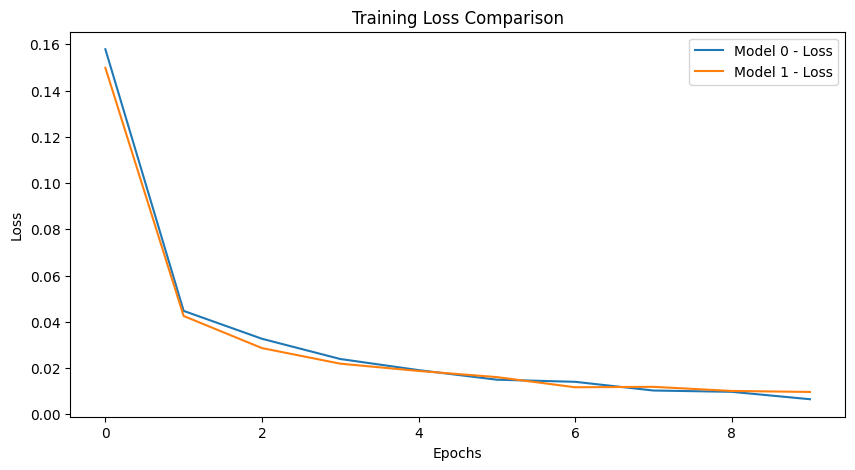

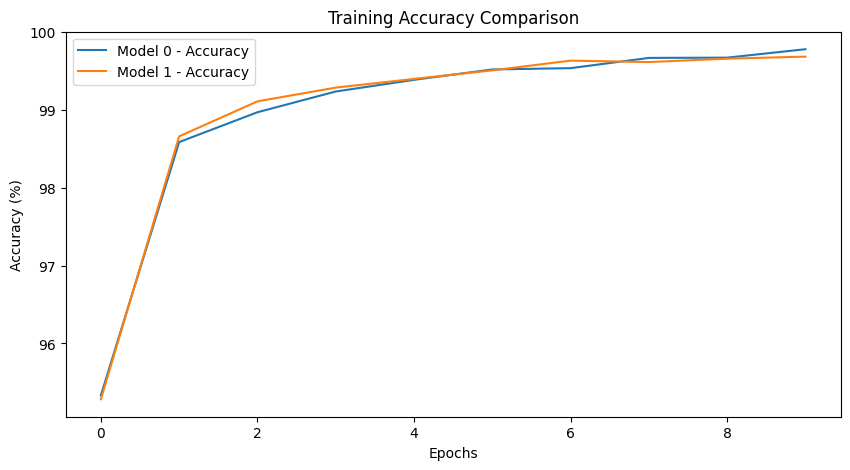

In [6]:
# Plot training loss for both models
plt.figure(figsize=(10, 5))D
plt.plot(losses0, label='Model 0 - Loss')
plt.plot(losses1, label='Model 1 - Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy for both models
plt.figure(figsize=(10, 5))
plt.plot(accuracies0, label='Model 0 - Accuracy')
plt.plot(accuracies1, label='Model 1 - Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
